In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
import mplfinance as mpf
%matplotlib inline

import statsmodels.api as sum
import seaborn as sns

import chart_studio.plotly as py

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf #Connects Plotly to Pandas
# Makes Plotly work in your Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot
init_notebook_mode(connected=True)
cf.go_offline()


In [2]:
df_1 = pd.read_csv('../datasets/AMZN.csv', index_col='Date', parse_dates=True)
df_1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-10-16,1773.33,1786.24,1770.52,1777.43,1777.43,2763400
2019-10-17,1796.49,1798.85,1782.02,1787.48,1787.48,2647400
2019-10-18,1787.80,1793.98,1749.20,1757.51,1757.51,3362500
2019-10-21,1769.66,1785.88,1765.00,1785.66,1785.66,2130400
2019-10-22,1788.15,1789.78,1762.00,1765.73,1765.73,2111700


In [3]:
df_1.index

DatetimeIndex(['2019-10-16', '2019-10-17', '2019-10-18', '2019-10-21',
               '2019-10-22', '2019-10-23', '2019-10-24', '2019-10-25',
               '2019-10-28', '2019-10-29',
               ...
               '2020-10-02', '2020-10-05', '2020-10-06', '2020-10-07',
               '2020-10-08', '2020-10-09', '2020-10-12', '2020-10-13',
               '2020-10-14', '2020-10-15'],
              dtype='datetime64[ns]', name='Date', length=253, freq=None)

#### Visualization

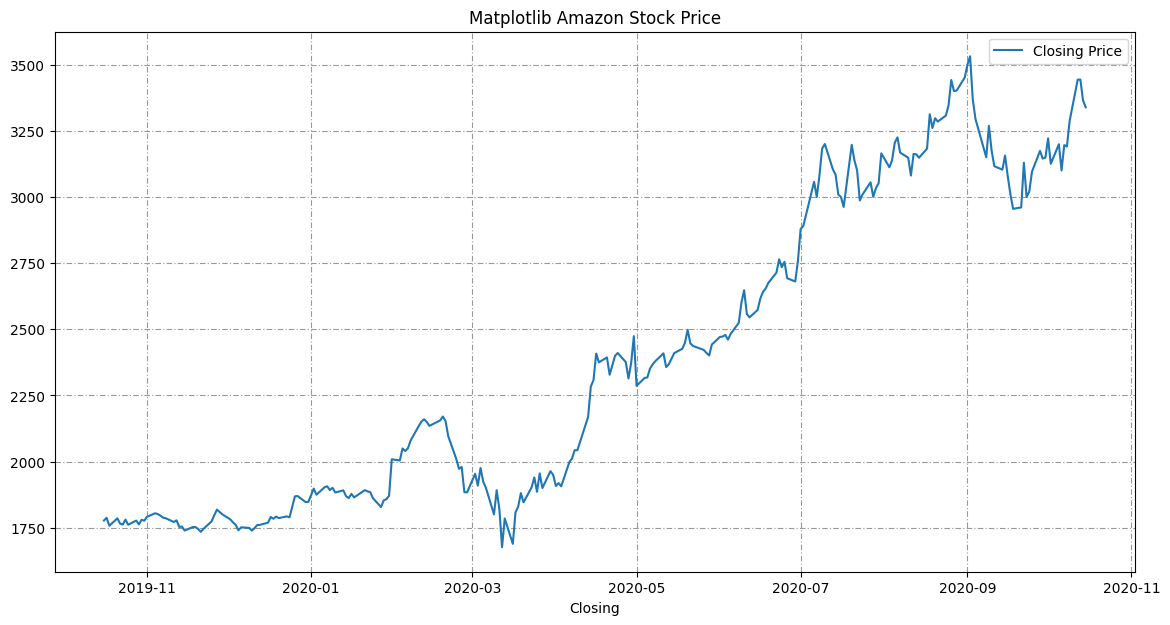

In [4]:
# Matplotlib
fig_1 = plt.figure(figsize=(12,6), dpi=100)
axies_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axies_1.set_xlabel('Date')
axies_1.set_xlabel('Closing')
axies_1.set_title('Matplotlib Amazon Stock Price')
axies_1.plot(df_1.index, df_1['Close'], label='Closing Price')
axies_1.legend(loc=0)
axies_1.grid(True, color='0.6', dashes=(5,2,1,2))

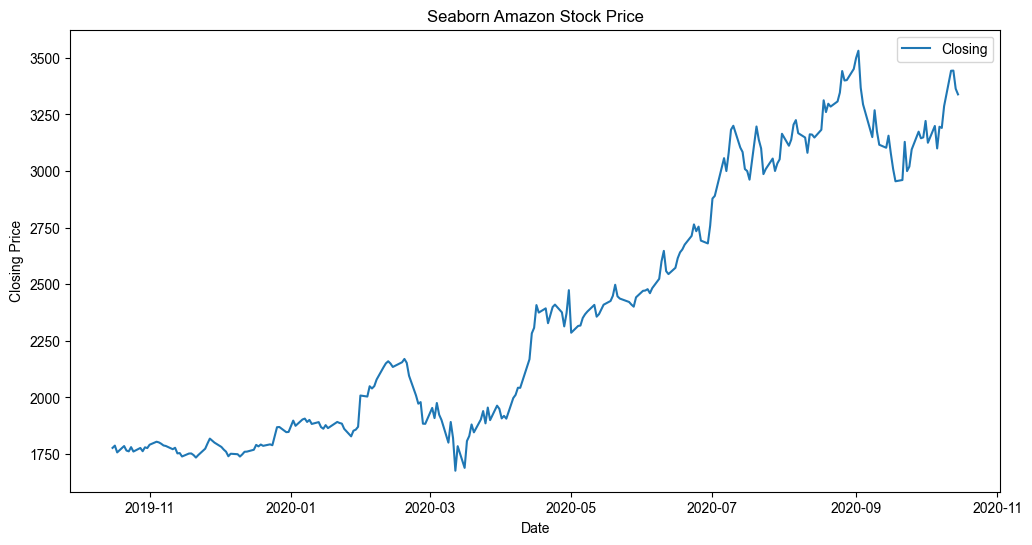

In [5]:
# Seaborn
fig_3 = plt.figure(figsize=(12,6), dpi=100)
axies_2 = sns.lineplot(data=df_1, x=df_1.index, y='Close', label='Closing')
axies_2.set(xlabel='Date', ylabel='Closing Price')
axies_2.set_title('Seaborn Amazon Stock Price')
axies_2.legend(loc=0)
sns.set_style('darkgrid', {'axes.facecolot': '.9'})
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':2.5})


In [6]:
# Plotly

fig_2 = go.Figure()
fig_2.add_trace(go.Scatter(x=df_1.index, y=df_1['Close'],
                           mode='lines',
                           name='Closing Price'))

fig_2.update_layout(
    xaxis=dict(
        showgrid=True, showline=True, showticklabels=True
    ),
    yaxis=dict(
        showgrid=True, showline=True, showticklabels=True
    ),
    showlegend=True,
    xaxis_title='Date', 
    yaxis_title='Closing Price',
    title='Plotly amazon Stock Price'
    )

#### Matplotlib Finance

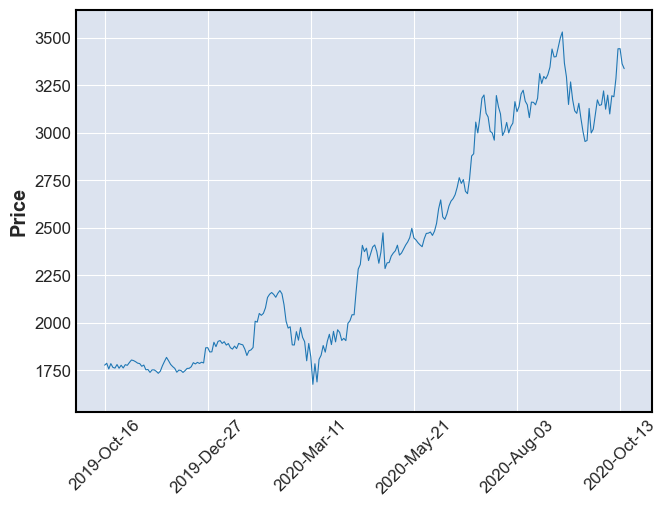

In [7]:
mpf.plot(df_1, type='line')

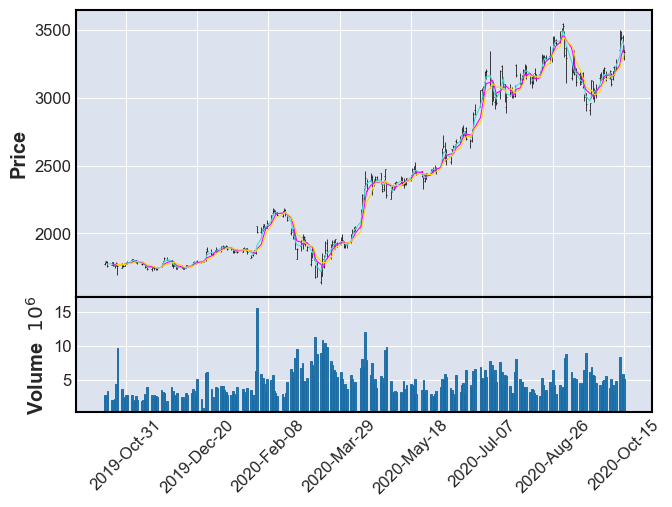

In [8]:
mpf.plot(df_1, type='ohlc', mav=(3,5,7), volume=True, show_nontrading=True)

#### Ploting Time Periods & Styling

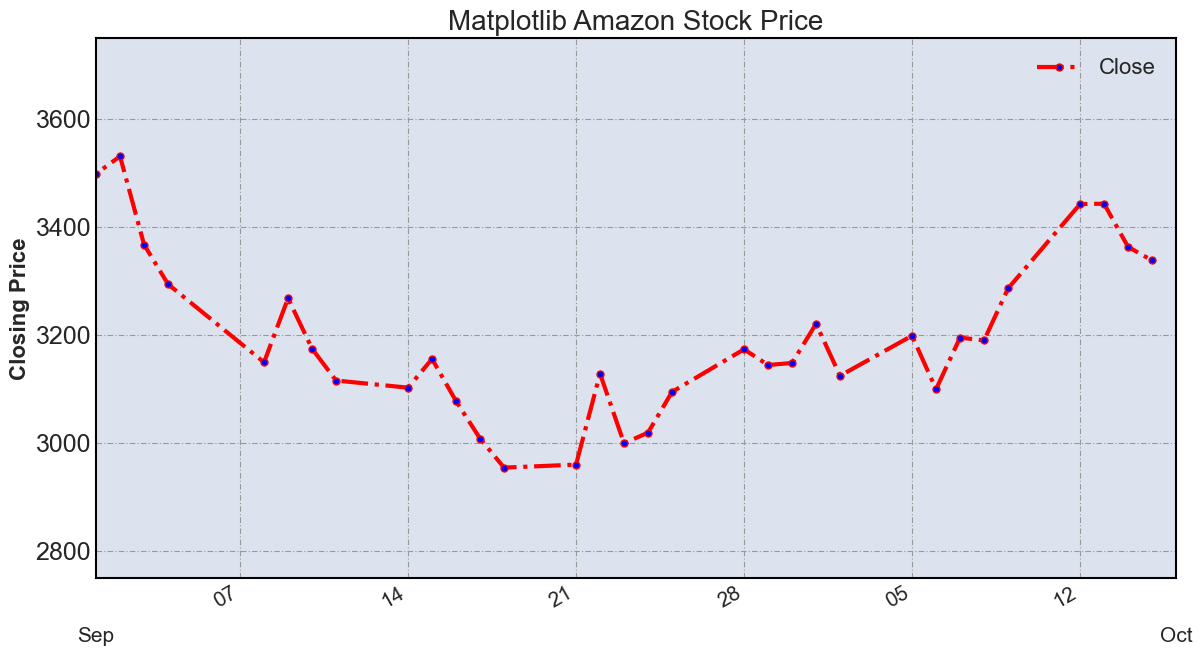

In [19]:
fig_1 = plt.figure(figsize=(12,6), dpi=100)
axies_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axies_1.set_xlabel('Date')
axies_1.set_xlabel('Closing')
axies_1.set_title('Matplotlib Amazon Stock Price', fontsize=20)

df_1['Close'].plot(figsize=(12,6),
                   xlim=['2020-09-01', '2020-10-16'],
                   ylim=[2750, 3750],
                   color='red',
                   lw=3,
                   ls='-.',
                   marker='o',
                   markersize=5,
                   markerfacecolor='blue')
axies_1.legend(loc=0)
axies_1.grid(True, color='0.6', dashes=(5,2,1,2))
axies_1.tick_params(axis='x', labelsize=15)
axies_1.tick_params(axis='y', labelsize=18)

plt.xlabel('', fontsize=18)
plt.ylabel('Closing Price', fontsize=16)

plt.legend(loc=0, prop= {'size': 16})

axies_1.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))

axies_1.xaxis.set_major_formatter(dates.DateFormatter('%d'))
axies_1.xaxis.set_minor_locator(dates.MonthLocator('%d'))
axies_1.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

axies_1.tick_params(axis='both', which='minor', labelsize=15)
